## Libraries

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yahooquery as yf
import math

## Load Ticker Data

In [165]:
ticker = "SPY"
data = yf.Ticker(ticker)

## Stock Data Exploration

In [166]:
df = data.history(start='2025-01-01').reset_index()
df.head()

,symbol,date,open,high,low,close,volume,adjclose,dividends
0,SPY,2025-01-02,589.390015,591.130005,580.500000,584.640015,50204000,579.561707,0.0
1,SPY,2025-01-03,587.530029,592.599976,586.429993,591.950012,37888500,586.808167,0.0
2,SPY,2025-01-06,596.270020,599.700012,593.599976,595.359985,47679400,590.188599,0.0
3,SPY,2025-01-07,597.419983,597.750000,586.780029,588.630005,60393100,583.517090,0.0
4,SPY,2025-01-08,588.700012,590.580017,585.200012,589.489990,47304700,584.369507,0.0


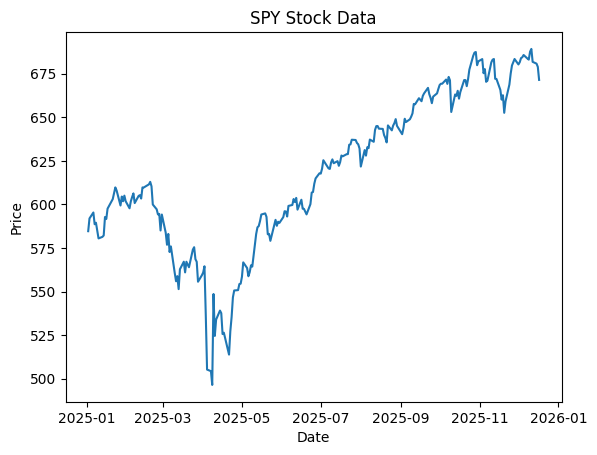

In [167]:
x = df['date']
y = df['close']
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{ticker} Stock Data')
plt.show()

## Daily Changes Exploration

In [168]:
diffs = []
for i in range(1, df.shape[0]):
    p1 = df['close'].iloc[i-1]
    p2 = df['close'].iloc[i]
    diff = round(((p2 - p1) / p2) * 100, 5)
    diffs.append(diff)


In [169]:
dff = pd.DataFrame(data=diffs, columns=["daily_change"])
stats=dff.describe()
stats

,daily_change
count,240.000000
mean,0.050037
std,1.230460
min,-6.218340
25%,-0.383105
50%,0.132525
75%,0.570420
max,9.503840


In [170]:
std = stats.loc['std', 'daily_change']
mean = stats.loc['mean', 'daily_change']

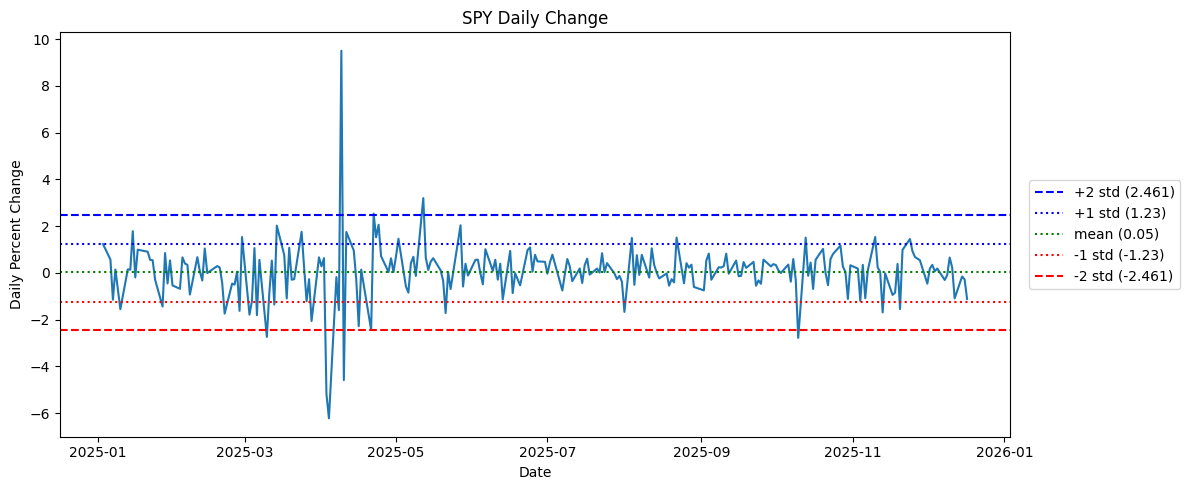

In [171]:
x = df['date'].iloc[1:]
y = dff['daily_change']

plt.figure(figsize=(12,5))    
plt.plot(x, y)

# Daily price change standard deviations
plt.axhline(y = 2*std, color = 'b', linestyle = '--', label = f'+2 std ({round(2*std, 3)})')
plt.axhline(y = 1*std, color = 'b', linestyle = 'dotted', label = f'+1 std ({round(1*std, 3)})')
plt.axhline(y = mean, color = 'g', linestyle = 'dotted', label = f'mean ({round(mean, 3)})')
plt.axhline(y = -1*std, color = 'r', linestyle = 'dotted', label = f'-1 std ({round(-1*std, 3)})')
plt.axhline(y = -2*std, color = 'r', linestyle = '--', label = f'-2 std ({round(-2*std, 3)})')

plt.xlabel('Date')
plt.ylabel('Daily Percent Change')
plt.title(f'{ticker} Daily Change')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0.)
plt.tight_layout()
plt.show()

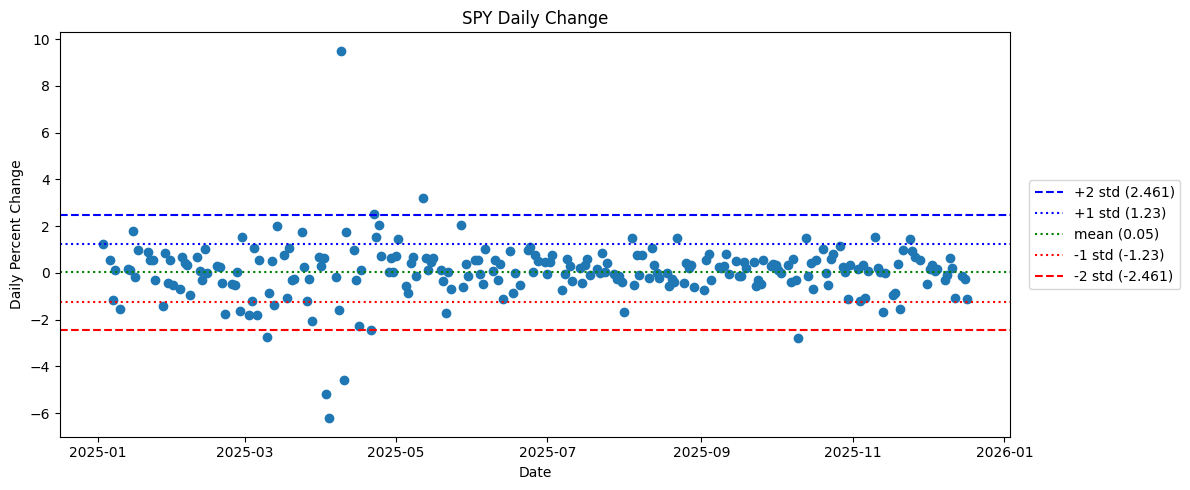

In [172]:
x = df['date'].iloc[1:]
y = dff['daily_change']

plt.figure(figsize=(12,5)) 

plt.scatter(x, y)

# Daily price change standard deviations
plt.axhline(y = 2*std, color = 'b', linestyle = '--', label = f'+2 std ({round(2*std, 3)})')
plt.axhline(y = 1*std, color = 'b', linestyle = 'dotted', label = f'+1 std ({round(1*std, 3)})')
plt.axhline(y = mean, color = 'g', linestyle = 'dotted', label = f'mean ({round(mean, 3)})')
plt.axhline(y = -1*std, color = 'r', linestyle = 'dotted', label = f'-1 std ({round(-1*std, 3)})')
plt.axhline(y = -2*std, color = 'r', linestyle = '--', label = f'-2 std ({round(-2*std, 3)})')

plt.xlabel('Date')
plt.ylabel('Daily Percent Change')
plt.title(f'{ticker} Daily Change')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0.)
plt.tight_layout()
plt.show()

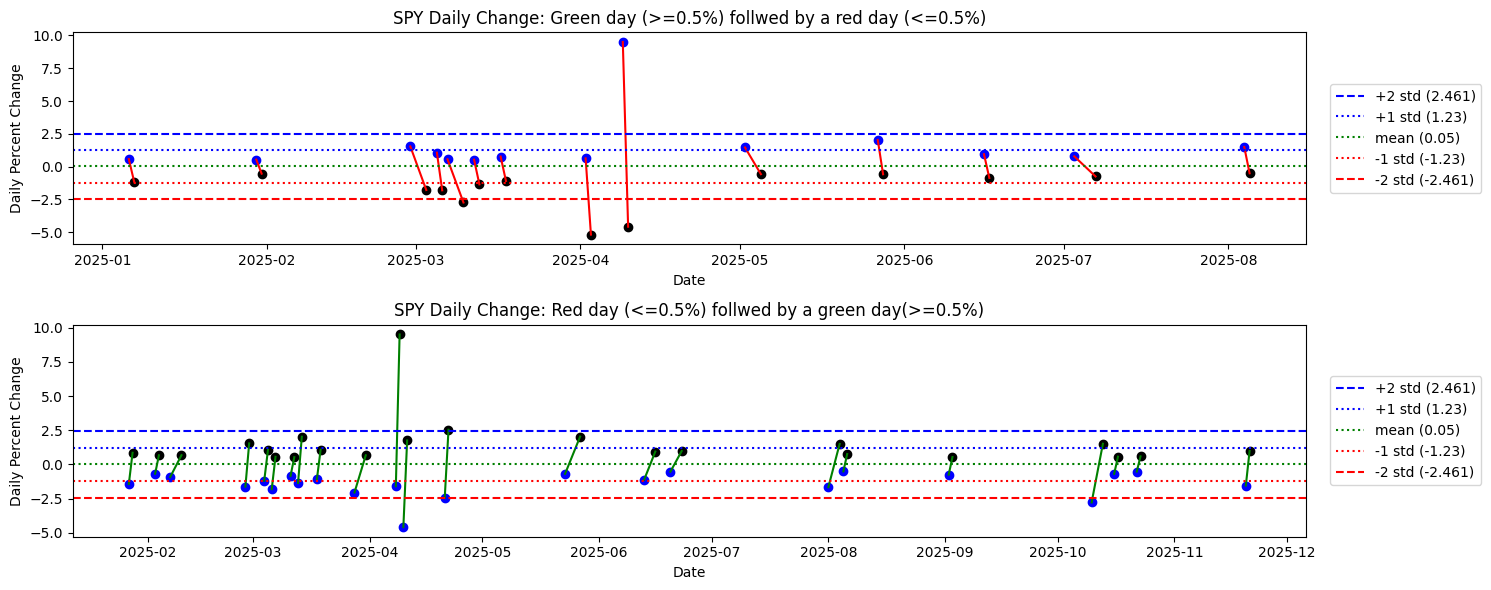

In [214]:
x = df['date'].iloc[1:]
y = dff['daily_change']

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize=(15,6)) 

thresh = 0.5

for i in range(len(y) - 1):
    # green day followed by a red day 
    if y[i] >= thresh and y[i+1] <= -thresh:
        ax1.scatter(x.iloc[i], y[i], color = 'blue')
        ax1.scatter(x.iloc[i+1], y[i+1], color = 'black')
        ax1.plot([x.iloc[i], x.iloc[i+1]], [y[i], y[i+1]], color = 'red')

    # red day followed by a green day
    elif y[i] <= -thresh and y[i+1] >= thresh:
        ax2.scatter(x.iloc[i], y[i], color = 'blue')
        ax2.scatter(x.iloc[i+1], y[i+1], color = 'black')
        ax2.plot([x.iloc[i], x.iloc[i+1]], [y[i], y[i+1]], color = 'green')

# Daily price change standard deviations
for ax in [ax1, ax2]:
    ax.axhline(y = 2*std, color = 'b', linestyle = '--', label = f'+2 std ({round(2*std, 3)})')
    ax.axhline(y = 1*std, color = 'b', linestyle = 'dotted', label = f'+1 std ({round(1*std, 3)})')
    ax.axhline(y = mean, color = 'g', linestyle = 'dotted', label = f'mean ({round(mean, 3)})')
    ax.axhline(y = -1*std, color = 'r', linestyle = 'dotted', label = f'-1 std ({round(-1*std, 3)})')
    ax.axhline(y = -2*std, color = 'r', linestyle = '--', label = f'-2 std ({round(-2*std, 3)})')

    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Percent Change')
    ax.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0.)

ax1.set_title(f'{ticker} Daily Change: Green day (>={thresh}%) follwed by a red day (<={thresh}%)')
ax2.set_title(f'{ticker} Daily Change: Red day (<={thresh}%) follwed by a green day(>={thresh}%)')
plt.tight_layout()
plt.show()

<Axes: ylabel='Count'>

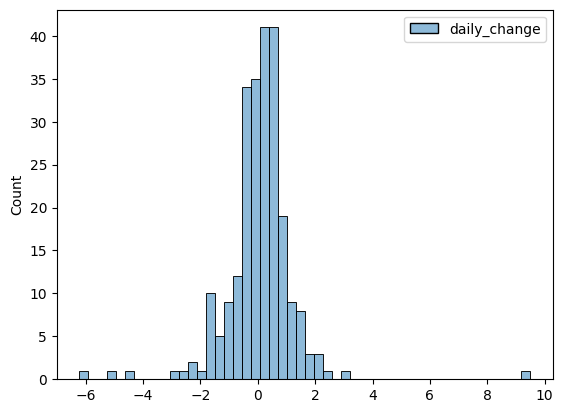

In [174]:
sns.histplot(data=dff, bins=50)

<Axes: >

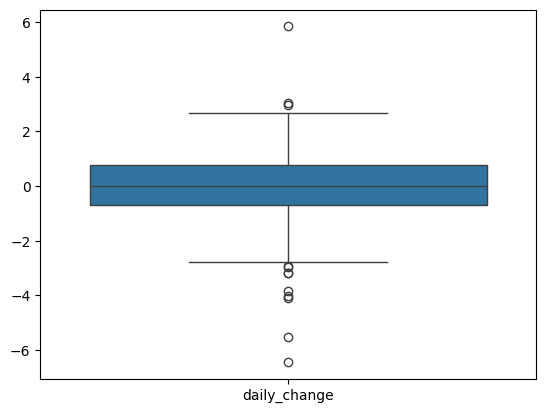

In [154]:
sns.boxplot(data = dff)

## Next Day Table

In [155]:
# Calculate min and max daily percent change
maxi = max(dff['daily_change'])
mini = min(dff['daily_change'])

print(f'({mini}, {maxi})')

(-6.46161, 5.84755)


In [156]:
bins = np.array(range(-5, 6, 1))
table = np.zeros((len(bins), len(bins)))

for i in range(len(diffs) - 1):
    today = 0
    for j in range(len(bins)):
        today = j
        if diffs[i] <= bins[j]:
            break
    
    tomorrow = 0
    for j in range(1, len(bins)):
        tomorrow = j
        if diffs[i+1] <= bins[j]:
            break
    
    table[today][tomorrow] += 1

change_counts_df = pd.DataFrame(table, columns=bins, index=bins)

print(f'Range of daily percent changes: ({mini}, {maxi})')
print("Next Day Change")
change_counts_df.style.background_gradient(cmap='Blues', axis=None)

Range of daily percent changes: (-6.46161, 5.84755)
Next Day Change


,-5,-4,-3,-2,-1,0,1,2,3,4,5
-5,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
-3,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
-2,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000
-1,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,7.000000,1.000000,2.000000,0.000000,0.000000
0,0.000000,2.000000,0.000000,2.000000,7.000000,31.000000,24.000000,11.000000,4.000000,1.000000,0.000000
1,0.000000,1.000000,1.000000,3.000000,8.000000,23.000000,23.000000,11.000000,2.000000,0.000000,1.000000
2,0.000000,0.000000,0.000000,4.000000,3.000000,8.000000,11.000000,5.000000,1.000000,0.000000,0.000000
3,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


## Buy Close Sell Open (BCSO) vs Buy OPen Sell Close (BOSC)

In [157]:
def buy(bal, price):
    shares = int((bal//price))
    cost = shares * price
    return shares, cost

In [158]:
# Buy Close Sell Open
def bcso(balance, hist):
    total_pnl = 0
    running_pnl = []

    for i in range(hist.shape[0] - 1):
        close = hist['close'].iloc[i]
        shares, cost = buy(balance, close)
        pos_pnl = shares*hist['open'].iloc[i+1] - cost
        balance += pos_pnl
        total_pnl += pos_pnl
        running_pnl.append(total_pnl)

    return total_pnl, running_pnl

In [159]:
# Buy Open Sell Close
def bosc(balance, hist):
    total_pnl = 0
    running_pnl = []

    for i in range(hist.shape[0]):
        open = hist['open'].iloc[i]
        shares, cost = buy(balance, open)
        pos_pnl = shares*hist['close'].iloc[i] - cost
        balance += pos_pnl
        total_pnl += pos_pnl
        running_pnl.append(total_pnl)

    return total_pnl, running_pnl

In [160]:
# Buy and Hold
def buy_and_hold(balance, hist):
    total_pnl = 0
    running_pnl = []

    buy_open = hist['open'].iloc[0]
    shares, cost = buy(balance, buy_open)

    for i in range(hist.shape[0]):
        close = hist['close'].iloc[i]
        total_pnl = shares*close - cost
        running_pnl.append(total_pnl)

    return total_pnl, running_pnl

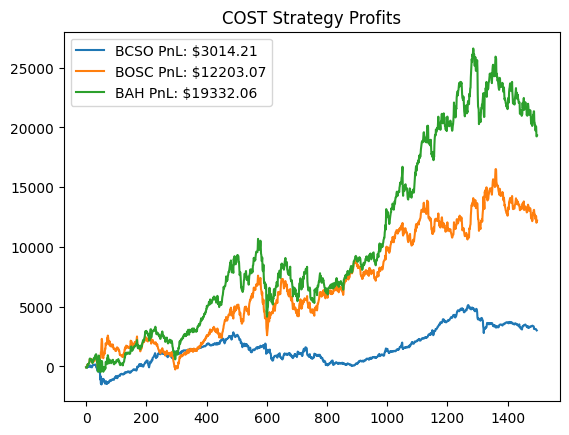

In [161]:
ticker = 'COST'
start = '2020-01-01'
history = yf.Ticker(ticker).history(start = start).reset_index()

bcso_pnl, bcso_run_pnl = bcso(10000, history)
bosc_pnl, bosc_run_pnl = bosc(10000, history)
bah_pnl, bah_run_pnl = buy_and_hold(10000, history)

x_bcso = range(len(bcso_run_pnl))
x_bosc = range(len(bosc_run_pnl))
x_bah = range(len(bah_run_pnl))

plt.plot(x_bcso, bcso_run_pnl, label = f'BCSO PnL: ${round(bcso_pnl, 2)}')
plt.plot(x_bosc, bosc_run_pnl, label = f'BOSC PnL: ${round(bosc_pnl, 2)}')
plt.plot(x_bah, bah_run_pnl, label = f'BAH PnL: ${round(bah_pnl, 2)}')

plt.title(f'{ticker} Strategy Profits')
plt.legend()
plt.show()